In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [266]:
def generate_data(w=[3,5], b=5, data_shape=(1000,2), y_class=2, shuffle=False):
    assert len(w)==data_shape[1], "the w lenghth should equal to the data's second dimension"
    x = np.random.random(data_shape)
    y = np.dot(x, w) + b + np.random.random(data_shape[0])
    y_range_max = np.sum(w) + 1
#     y_min = b
    interval = y_range_max / y_class
    y_final = y.copy()
    y_max = b
    c = list(range(y_class))
    if shuffle:
        random.shuffle(c)
    for i in range(y_class):
        y_min = y_max
        y_max += interval
        mask = (y >= y_min) &(y < y_max)
        y_final[mask] = c[i]
    return x,y_final

In [162]:
import random
class linear_model:
    def __init__(self, learning_rate=0.01):
        self.coef_ = []
        self.bias = 1
        self.lr = learning_rate
        
    def shuffle_data(self, x, y):
        c = list(zip(x, y))
        random.shuffle(c)
        a, b = zip(*c)
        a = np.array(a)
        b = np.array(b)
        return a, b
        
    def fit(self, X, y, epochs=100, batch_size=8, seed=42):
#         self.coef_ = np.random.random(X.shape[1])
        np.seed = seed
        random.seed(seed)
        self.coef_ = np.ones(X.shape[1])
        assert len(X.shape)==2, "the shape of X need to be 2d"
        assert len(y.shape)==1, "the shape of y need to be 1d"
        assert len(X)==len(y), "len of X need to equal len of y"
        for i in range(epochs):
            for j in range(len(X)//batch_size - 1):
                start = batch_size*j
                end = batch_size*(j+1)
                self.learn_with_batch_size(X[start:end], y[start:end])
            i = len(X)//batch_size - 1
            start = i * batch_size
            self.learn_with_batch_size(X[start:], y[start:])
            X, y = self.shuffle_data(X, y)
                
    def learn_with_batch_size(self, x, label):
        error = np.mean(np.square(np.dot(self.coef_, x.T) + self.bias - label))
        residual = np.dot(self.coef_, x.T) + self.bias - label
        gradient =  np.mean(np.multiply(self.coef_, x).T * residual, axis=1)
        self.coef_ = self.coef_ - gradient * self.lr
        self.bias = self.bias - self.lr * np.mean(residual)
        
    def predict(self, x):
        return np.dot(self.coef_, x.T) + self.bias

    def score(self, x, y):
        return np.mean(np.square(self.predict(x) - y))

In [420]:
x,y = generate_data(y_class=2)
model = linear_model()
model.fit(x,y)
np.mean(np.round(np.array(model.predict(x))) == y)

0.939

In [421]:
def plot_the_contour_figure(x, y, m):
    x_range = np.linspace(int(x[:,0].min()), int(x[:,0].max())+1, 100)
    y_range = np.linspace(int(x[:,1].min()), int(x[:,1].max())+1, 100)
    X,Y = np.meshgrid(x_range, y_range)
    predict = [m.predict(np.c_[X[i],Y[i]]) for i in range(len(X))]
    predict = np.round(predict)
#     print(predict.shape)
    plt.contourf(x_range, y_range, predict , color='b')
    # plt.plot(x[:, 0], model.predict(x[:]), color='b')
    colors = ['r', 'b', 'orange', 'purple', 'm', 'c', 'y', 'k']
    for i in range(len(np.unique(y))):
        mask = y==i
        plt.scatter(x[mask,0], x[mask,1], c=colors[i], s=3)

C:\Users\EastGeno\.conda\envs\tf2_0\lib\site-packages\ipykernel_launcher.py:8: UserWarning: The following kwargs were not used by contour: 'color'
  


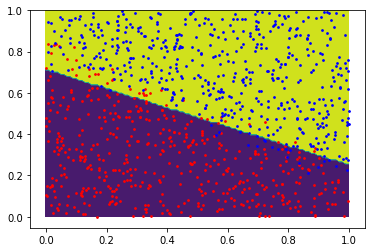

In [422]:
plot_the_contour_figure(x, y, model)

In [444]:
x,y = generate_data(y_class=2, shuffle=True)
model = linear_model()
model.fit(x,y)
np.mean(np.round(np.array(model.predict(x))) == y)

0.502

C:\Users\EastGeno\.conda\envs\tf2_0\lib\site-packages\ipykernel_launcher.py:8: UserWarning: The following kwargs were not used by contour: 'color'
  


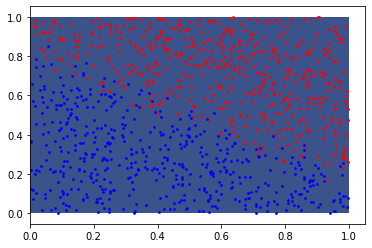

In [445]:
plot_the_contour_figure(x, y, model)

In [446]:
def sigmoid(x):
    return np.exp(x)/(1+np.exp(x))

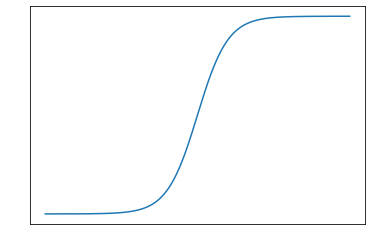

In [482]:
plt.plot(np.linspace(-10,10,1000), sigmoid(np.linspace(-10,10,1000)))

In [447]:
class logistic_regression:
    def __init__(self, learning_rate=0.1):
        self.coef_ = []
        self.bias = 1
        self.lr = learning_rate
        self.beta = 0.9
        self.c = 0.1
        
    def shuffle_data(self, x, y):
        c = list(zip(x, y))
        random.shuffle(c)
        a, b = zip(*c)
        a = np.array(a)
        b = np.array(b)
        return a, b
        
    def fit(self, X, y, epochs=100, batch_size=8, seed=42):
#         self.coef_ = np.random.random(X.shape[1])
        np.seed = seed
        random.seed(seed)
        self.coef_ = np.ones(X.shape[1])
        assert len(X.shape)==2, "the shape of X need to be 2d"
        assert len(y.shape)==1, "the shape of y need to be 1d"
        assert len(X)==len(y), "len of X need to equal len of y"
        for i in range(epochs):
            for j in range(len(X)//batch_size - 1):
                start = batch_size*j
                end = batch_size*(j+1)
                self.learn_with_batch_size(X[start:end], y[start:end])
            i = len(X)//batch_size - 1
            start = i * batch_size
            self.learn_with_batch_size(X[start:], y[start:])
            X, y = self.shuffle_data(X, y)
                
    def learn_with_batch_size(self, x, label):
#         error = np.mean(np.square(np.dot(self.coef_, x.T) + self.bias - label))
#         residual = np.mean(np.dot(self.coef_, x.T) + self.bias - label)
        p = self.predict_p(x)
        gradient = (label - p) / (p*(1-p))
        residual = (self.predict_p(x) - label)
        m_res = np.mean(residual)
        gradient = np.dot(x.T, residual)/len(x)
        self.coef_ = self.coef_ - gradient * self.lr
        self.bias = self.bias - self.lr * m_res
        
    def predict_p(self, x):
        return sigmoid(np.dot(self.coef_, x.T) + self.bias)
    
    def predict(self, x):
        return sigmoid(np.dot(self.coef_, x.T) + self.bias)>0.5
    def predict_value(self, x):
        return np.dot(self.coef_, x.T) + self.bias
    def score(self, x, y):
        return np.mean((y == self.predict(x)))

In [448]:
class logisitc_multiclass:
    def __init__(self, learning_rate=0.1):
        self.coef_ = []
        self.bias = 1
        self.lr = learning_rate
        self.beta = 0.9
        self.c = 0.1
        
    def shuffle_data(self, x, y):
        c = list(zip(x, y))
        random.shuffle(c)
        a, b = zip(*c)
        a = np.array(a)
        b = np.array(b)
        return a, b
        
    def fit(self, X, y, epochs=100, batch_size=8, seed=42):
#         self.coef_ = np.random.random(X.shape[1])
        np.seed = seed
        random.seed(seed)
        self.categorys = len(np.unique(y))
        model_to_train = self.categorys
        self.coef_ = np.ones((model_to_train, X.shape[1]))
        self.bias = np.ones(model_to_train)
        assert len(X.shape)==2, "the shape of X need to be 2d"
        assert len(y.shape)==1, "the shape of y need to be 1d"
        assert len(X)==len(y), "len of X need to equal len of y"
        
        for m in range(model_to_train):
            y_temp = y.copy()
            mask = y!=m
            y_temp[mask] = 0
            mask = np.array(mask^1, dtype="bool")
            y_temp[mask] = 1
            X_temp = X.copy()
            for i in range(epochs):
                for j in range(len(X)//batch_size - 1):
                    start = batch_size*j
                    end = batch_size*(j+1)
                    self.learn_with_batch_size(X_temp[start:end], y_temp[start:end], m)
                i = len(X)//batch_size - 1
                start = i * batch_size
                self.learn_with_batch_size(X_temp[start:], y_temp[start:], m)
                X_temp, y_temp = self.shuffle_data(X_temp, y_temp)
                
    def learn_with_batch_size(self, x, label, i):
#         error = np.mean(np.square(np.dot(self.coef_, x.T) + self.bias - label))
#         residual = np.mean(np.dot(self.coef_, x.T) + self.bias - label)
        p = self.predict_p(x, i)
#         gradient = (label - p) / (p*(1-p))
        residual = (self.predict_p(x, i) - label)
        m_res = np.mean(residual)
        gradient = np.dot(x.T, residual)/len(x)
        self.coef_[i] = self.coef_[i] - gradient * self.lr
        self.bias[i] = self.bias[i] - m_res * self.lr 
        
    def predict_p(self, x, i):
        return sigmoid(np.dot(self.coef_[i], x.T) + self.bias[i])
    
    def predict(self, x):
        result = np.array([[self.predict_p(x, i)] for i in range(self.categorys)]).T
        result = np.argmax(result, axis=2).reshape(-1)
        return result
    def predict_value(self, x, i):
        return np.dot(self.coef_[i], x.T) + self.bias[i]
    def score(self, x, y):
        return np.mean((y == self.predict(x)))

In [449]:
model = logistic_regression()
model.fit(x, y)
model.score(x,y)

0.949

C:\Users\EastGeno\.conda\envs\tf2_0\lib\site-packages\ipykernel_launcher.py:8: UserWarning: The following kwargs were not used by contour: 'color'
  


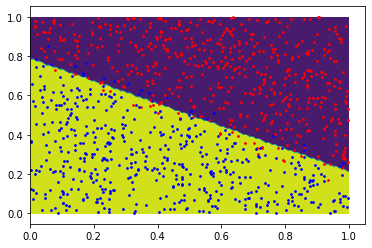

In [450]:
plot_the_contour_figure(x, y, model)

In [451]:
class logisitc_multiclass:
    def __init__(self, learning_rate=0.01):
        self.coef_ = []
        self.bias = 1
        self.lr = learning_rate
        self.beta = 0.9
        self.c = 0.1
        
    def fit(self, X, y, epochs=100, batch_size=8, seed=42):
#         self.coef_ = np.random.random(X.shape[1])
        np.seed = seed
        random.seed(seed)
        self.categorys = len(np.unique(y))
        model_to_train = self.categorys
        self.coef_ = np.ones((model_to_train, X.shape[1]))
        self.bias = np.ones(model_to_train)
        assert len(X.shape)==2, "the shape of X need to be 2d"
        assert len(y.shape)==1, "the shape of y need to be 1d"
        assert len(X)==len(y), "len of X need to equal len of y"
        
        for m in range(model_to_train):
            y_temp = y.copy()
            mask = y!=m
            y_temp[mask] = 0
            mask = np.array(mask^1, dtype="bool")
            y_temp[mask] = 1
            X_temp = X.copy()
            model = logistic_regression(learning_rate=self.lr)
            model.fit(X_temp, y_temp, epochs=epochs)
            self.coef_[m] = model.coef_
            self.bias[m] = model.bias
                
    def predict_p(self, x, i):
        return sigmoid(np.dot(self.coef_[i], x.T) + self.bias[i])
    
    def predict(self, x):
        result = np.array([[self.predict_p(x, i)] for i in range(self.categorys)]).T
        result = np.argmax(result, axis=2).reshape(-1)
        return result
    def predict_value(self, x, i):
        return np.dot(self.coef_[i], x.T) + self.bias[i]
    def score(self, x, y):
        return np.mean((y == self.predict(x)))

In [460]:
x,y = generate_data(y_class=3, shuffle=True)
model = logisitc_multiclass(0.1)
model.fit(x, y)
model.score(x,y)

0.897

In [461]:
def predict_x2(x1, coef, bias):
    return -(x1 * coef[0] + bias)/coef[1]

C:\Users\EastGeno\.conda\envs\tf2_0\lib\site-packages\ipykernel_launcher.py:8: UserWarning: The following kwargs were not used by contour: 'color'
  


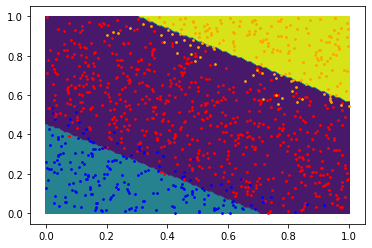

In [464]:
plot_the_contour_figure(x, y, model)

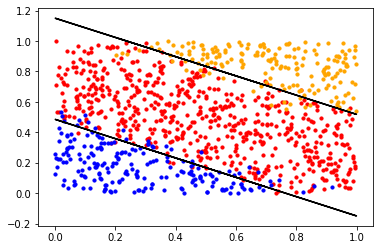

In [463]:
# plt.plot(x[:, 0], model.predict_value(x[:]), color='b')
colors = ['r', 'b', 'orange', 'purple', 'm', 'c', 'y', 'k']
for i in range(len(np.unique(y))):
    mask = y==i
#     plt.scatter(x[mask,0][:100], x[mask,1][:100], c=c, s=10)
    plt.scatter(x[mask,0][:], x[mask,1][:], c=colors[i], s=10)
# plt.plot(x[:,0], predict_x2(x[:,0], model.coef_[0], model.bias[0]), color='black')
plt.plot(x[:,0], predict_x2(x[:,0], model.coef_[1], model.bias[1]), color='black')
plt.plot(x[:,0], predict_x2(x[:,0], model.coef_[2], model.bias[2]), color='black')
#     break

In [465]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x,y)
model.score(x,y)

C:\Users\EastGeno\.conda\envs\tf2_0\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\EastGeno\.conda\envs\tf2_0\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.849

C:\Users\EastGeno\.conda\envs\tf2_0\lib\site-packages\ipykernel_launcher.py:8: UserWarning: The following kwargs were not used by contour: 'color'
  


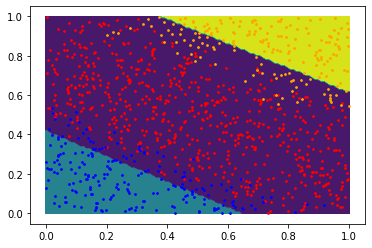

In [466]:
plot_the_contour_figure(x, y, model)

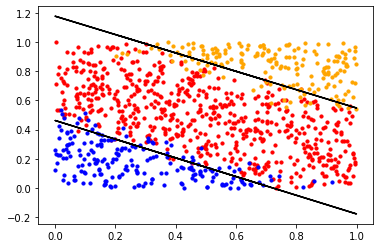

In [469]:
# plt.plot(x[:, 0], model.predict_value(x[:]), color='b')
colors = ['r', 'b', 'orange', 'purple', 'm', 'c', 'y', 'k']
for i in range(len(np.unique(y))):
    mask = y==i
#     plt.scatter(x[mask,0][:100], x[mask,1][:100], c=c, s=10)
    plt.scatter(x[mask,0][:], x[mask,1][:], c=colors[i], s=10)
# plt.plot(x[:,0], predict_x2(x[:,0], model.coef_[0], model.intercept_[0]), color='black')
plt.plot(x[:,0], predict_x2(x[:,0], model.coef_[1], model.intercept_[1]), color='black')
plt.plot(x[:,0], predict_x2(x[:,0], model.coef_[2], model.intercept_[2]), color='black')
#     break